   PassengerId Survived  Pclass                                         Name  \
0          343       No       2                   Collander, Mr. Erik Gustaf   
1           76       No       3                      Moen, Mr. Sigurd Hansen   
2          641       No       3                       Jensen, Mr. Hans Peder   
3          568       No       3  Palsson, Mrs. Nils (Alma Cornelia Berglund)   
4          672       No       1                       Davidson, Mr. Thornton   

      Sex   Age  SibSp  Parch      Ticket     Fare  Cabin Embarked  
0    male  28.0      0      0      248740  13.0000    NaN        S  
1    male  25.0      0      0      348123   7.6500  F G73        S  
2    male  20.0      0      0      350050   7.8542    NaN        S  
3  female  29.0      0      4      349909  21.0750    NaN        S  
4    male  31.0      1      0  F.C. 12750  52.0000    B71        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):


"\ncette fonctionnalité n'est pas utile\n"

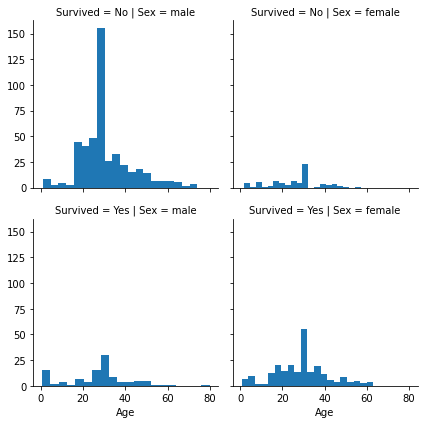

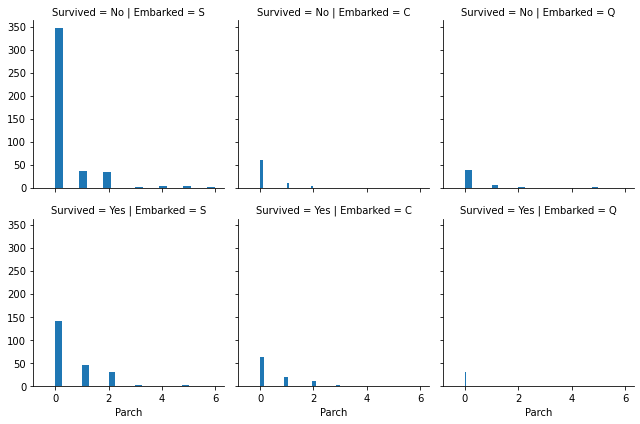

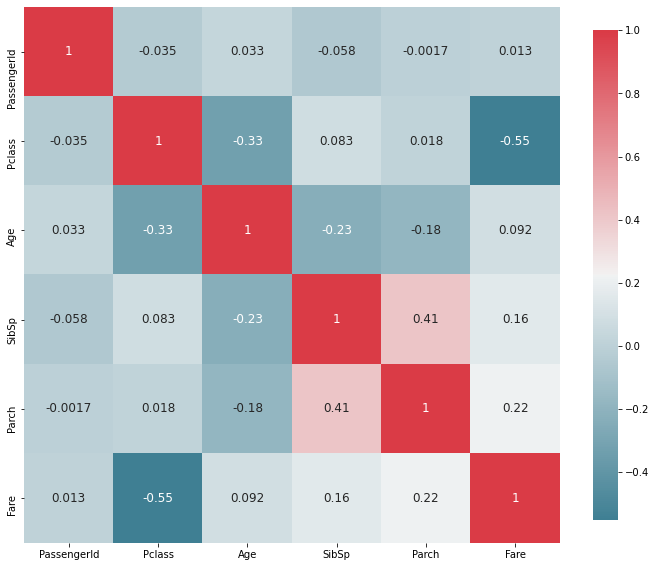

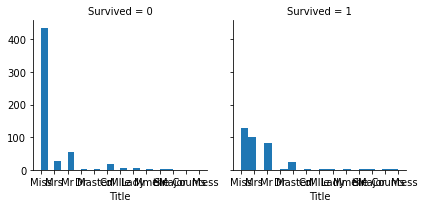

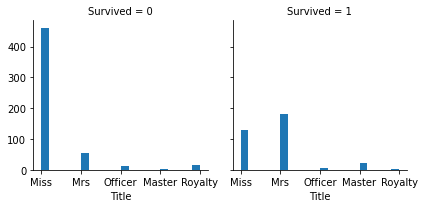

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data= pd.read_csv('titanic-passengers.csv',delimiter=";")

#Phase de prétraitement
print(data.head())
print(data.info())
print(data.describe())
#remplacer les valeurs manquantes par la moyenne
data['Age'].fillna(data['Age'].mean(),inplace=True)
#remplacer les valeurs manquantes par la valeur la plus frequente 
data['Embarked'].fillna('S',inplace=True)
data['Cabin'].fillna('none',inplace=True)

#Phase de visualisation

g=sns.FacetGrid(data,col="Sex",row='Survived')
g.map(plt.hist,'Age',bins=20)

g=sns.FacetGrid(data,col="Embarked",row='Survived')
g.map(plt.hist,'Parch',bins=20)
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr,cmap = cmap,square=True,cbar_kws={ 'shrink' : .9 },ax=ax,annot = True,annot_kws = { 'fontsize' : 12 })
plot_correlation_map(data)
"""
    il permet de de faire la corrélation entre tout les varriable numerique
"""

survi={'Survived':{'Yes':1,'No':0}}
data.replace(survi,inplace=True)
data[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

data.drop('Cabin', inplace=True, axis=1)
data.drop('Ticket', inplace=True, axis=1)

#ajout colonne Titre
my_list = list(data['Name'])
title=[]
for i in my_list:
    title.append((i.split(",")[1].split(".")[0]).strip()) 
data['Title']=title

g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,'Title',bins=20)

#regroupement des titres
Title_Dictionary = {"Capt":"Officer","Col":"Officer", "Major":"Officer","Dr":"Officer","Rev":"Officer","Jonkheer":"Royalty",
    "Don":"Royalty","Sir" :"Royalty","Lady" :"Royalty","the Countess": "Royalty","Dona":"Royalty",
    "Mme":"Miss","Mlle":"Miss","Miss" :"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs","Master" :"Master"
}
data.replace({'Title':Title_Dictionary},inplace=True)

g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,'Title',bins=20)

data['FamilySize']= data['Parch']+data['Parch']
"""
cette fonctionnalité n'est pas utile
"""